# 接收拒绝采样 （Rejection Sampling）

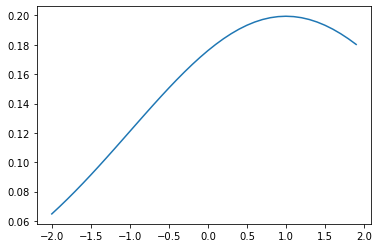

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import random

%matplotlib inline

mean = 1
standard_deviation = 2

x_values = np.arange(-2, 2, 0.1)
y_values = norm(mean, standard_deviation)

plt.plot(x_values, y_values.pdf(x_values))


可以使用一个均匀分布作为envelope把这个分布包起来

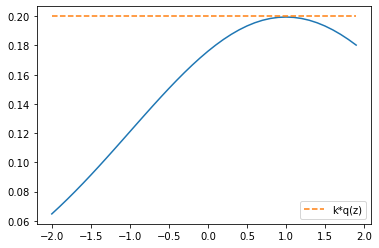

In [2]:
plt.plot(x_values, y_values.pdf(x_values))

# 在-2, 2之间的均匀分布是 pdf应该是1/4， 所以k = 0.2/（1/4） = 0.8 
plt.plot(x_values, [0.2 for xi in x_values] , '--', label="k*q(z)");
plt.legend()

In [3]:
def accept_reject():
    while True:
        u = random.uniform(0, 1)
        q = random.uniform(0, 1) * 4 - 2
        x = y_values.pdf(q) / 0.2 
        if u <= x:
            return q  

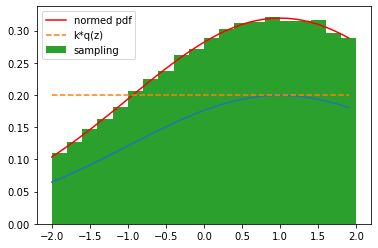

In [4]:
samples = []
for i in range(100000):
    samples.append(accept_reject())
plt.plot(x_values, y_values.pdf(x_values))
normed_value = y_values.cdf(2.0) - y_values.cdf(-2.0)
plt.plot(x_values, y_values.pdf(x_values) / normed_value, 'r', label="normed pdf")


# 在-4到4之间的均匀分布是 pdf应该是1/8， 所以k = 0.2/（1/8） = 1.6 
plt.plot(x_values, [0.2 for xi in x_values] , '--', label="k*q(z)");
plt.hist(samples, bins=20, density=True, label='sampling')
plt.legend()
plt.show()

## 马尔科夫链的平稳分布




In [5]:
transfer_matrix = np.array([[0.2, 0.8, 0.0], [0.2, 0.6, 0.2], [0.1, 0.0, 0.9]], dtype='float32')
dist = np.array([1.0, 0.0, 0.0], dtype='float32')

In [6]:
single = []
inRelation = []
married = []

for i in range(30):
    dist = np.dot(dist, transfer_matrix)
    single.append(dist[0])
    inRelation.append(dist[1])
    married.append(dist[2])

In [7]:
print(dist)

[0.14286481 0.28576234 0.5713729 ]


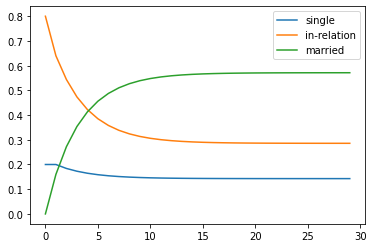

In [8]:
x = np.arange(30)
plt.plot(x, single, label='single')
plt.plot(x, inRelation, label='in-relation')
plt.plot(x, married, label='married')
plt.legend()
plt.show()

In [9]:
dist = np.array([0.4, 0.3, 0.3], dtype='float32')

In [10]:
single = []
inRelation = []
married = []
for i in range(30):
    dist = np.dot(dist, transfer_matrix)
    single.append(dist[0])
    inRelation.append(dist[1])
    married.append(dist[2])

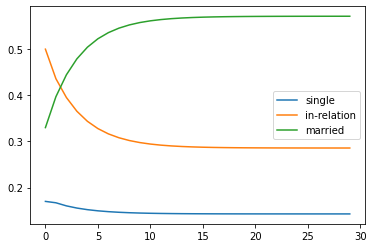

In [11]:
x = np.arange(30)
plt.plot(x, single, label='single')
plt.plot(x, inRelation, label='in-relation')
plt.plot(x, married, label='married')
plt.legend()
plt.show()

In [12]:
print(dist)

[0.1428604  0.28573468 0.57140493]


In [13]:
def norm_dist_prob(x, mean = 1, std = 2):
    return norm(mean, std).pdf(x)
    
n_1 =1000

    
T = 50000
pi = [0 for i in range(T)]
t = 2
sigma = 1
while t < T-1:
    t = t + 1;
    p_new = norm.rvs(loc=pi[t - 1], scale=sigma, size=1, random_state=None) 
    alpha = norm_dist_prob(p_new) * norm(p_new, sigma).pdf(pi[t-1])
    u = random.uniform(0, 1)
    if (u < alpha):
        pi[t] = p_new[0]
    else:
        pi[t] = pi[t-1]
        


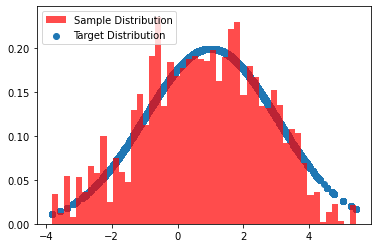

In [14]:
plt.scatter(pi[1000:], norm_dist_prob(pi[1000:]), label='Target Distribution') 
num_bins = 50
plt.hist(pi[1000:], num_bins, density=True, facecolor='red', alpha=0.7, label='Sample Distribution')
plt.legend()
plt.show()

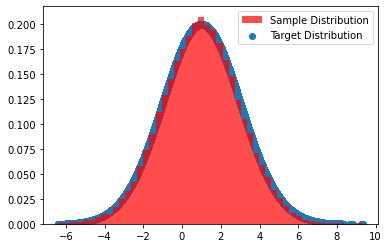

In [15]:
T = 50000
pi = [0 for i in range(T)]
t = 0
sigma = 1
while t < T-1:
    t = t + 1;
    p_new = norm.rvs(loc=pi[t - 1], scale=sigma, size=1, random_state=None) 
    alpha = min(1, norm_dist_prob(p_new[0]) / norm_dist_prob(pi[t-1]))
    u = random.uniform(0, 1)
    if (u < alpha):
        pi[t] = p_new[0]
    else:
        pi[t] = pi[t-1]
        
        
plt.scatter(pi[1000:], norm_dist_prob(pi[1000:]), label='Target Distribution') 
num_bins = 50
plt.hist(pi[1000:], num_bins, density=True, facecolor='red', alpha=0.7, label='Sample Distribution')
plt.legend()
plt.show()